# <b> PROBEM STATEMENT - The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = '/content/drive/MyDrive/AlmaBetter/Data/'

In [ ]:
#Loading Global Terrorism Data
gta_df = pd.read_csv(path + 'Global Terrorism Data.csv', encoding = 'latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
gta_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
print("There are {} rows and {} columns in the dataset.".format(gta_df.shape[0],gta_df.shape[1]))

There are 181691 rows and 135 columns in the dataset.


# **Cleaning the Data**

In [ ]:
#Rename the necessary column names
gta_df=gta_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type', 'target1': 'Target', 'nkill' : 'Killed', 'nwound' : 'Wounded', 'summary' : 'Summary', 'targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type', 'motive' : 'Motive'})

In [ ]:
#Check if the columns are updated
gta_df

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
#Keeping the only columns that are required for the analysis
gta_df=gta_df[['Year','Month','Day','Country','Region','State','City', 'latitude', 'longitude', 'Attack_type', 'Killed', 'Wounded', 'Target', 'Summary', 'Target_type','Target_subtype','Gang_name','Weapon_type', 'Motive']]

In [ ]:
#Updated data
gta_df

,Year,Month,Day,Country,Region,State,City,latitude,longitude,Attack_type,Killed,Wounded,Target,Summary,Target_type,Target_subtype,Gang_name,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,Private Citizens & Property,Named Civilian,MANO-D,Unknown,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Military,Military Checkpoint,Al-Shabaab,Firearms,NaN
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives,NaN
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,NaN
181689,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Government (General),Government Building/Facility/Office,Unknown,Explosives,NaN


Some neccessary columns are renamed as per requirement.

In [ ]:
# Check the information of our dataset
gta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   State           181270 non-null  object 
 6   City            181257 non-null  object 
 7   latitude        177135 non-null  float64
 8   longitude       177134 non-null  float64
 9   Attack_type     181691 non-null  object 
 10  Killed          171378 non-null  float64
 11  Wounded         165380 non-null  float64
 12  Target          181055 non-null  object 
 13  Summary         115562 non-null  object 
 14  Target_type     181691 non-null  object 
 15  Target_subtype  171318 non-null  object 
 16  Gang_name       181691 non-null  object 
 17  Weapon_typ

In [ ]:
# Check the summary of our dataframe

gta_df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [ ]:
# Check the number of data present in each variable
gta_df.count()

Year              181691
Month             181691
Day               181691
Country           181691
Region            181691
State             181270
City              181257
latitude          177135
longitude         177134
Attack_type       181691
Killed            171378
Wounded           165380
Target            181055
Summary           115562
Target_type       181691
Target_subtype    171318
Gang_name         181691
Weapon_type       181691
Motive             50561
dtype: int64

In [ ]:
# Shape of our dataset
gta_df.shape

(181691, 19)

In [ ]:
# filling null values  with zero and unknowns with unknown
gta_df["Killed"]= gta_df["Killed"].fillna(0)
gta_df["Wounded"]= gta_df["Wounded"].fillna(0)
gta_df["City"]=gta_df['City'].fillna('unknown')
gta_df["Summary"]= gta_df["Summary"].fillna(0)
gta_df["latitude"]= gta_df["latitude"].fillna(0)
gta_df["longitude"]= gta_df["Wounded"].fillna(0)
gta_df["Gang_name"]=gta_df['Gang_name'].fillna('unknown')
gta_df["Weapon_type"]=gta_df['Weapon_type'].fillna('unknown')
gta_df["Motive"]= gta_df["Motive"].fillna(0)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# Droping all null values in the dataset
gta_df=gta_df.dropna(axis=1)

In [ ]:
gta_df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
City           0
latitude       0
longitude      0
Attack_type    0
Killed         0
Wounded        0
Summary        0
Target_type    0
Gang_name      0
Weapon_type    0
Motive         0
dtype: int64

There are no null values in the dataset

In [ ]:
#  Check our final dataset
gta_df

,Year,Month,Day,Country,Region,City,latitude,longitude,Attack_type,Killed,Wounded,Summary,Target_type,Gang_name,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,0.0,Assassination,1.0,0.0,0,Private Citizens & Property,MANO-D,Unknown,0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,0.0,Hostage Taking (Kidnapping),0.0,0.0,0,Government (Diplomatic),23rd of September Communist League,Unknown,0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,0.0,Assassination,1.0,0.0,0,Journalists & Media,Unknown,Unknown,0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,0.0,Bombing/Explosion,0.0,0.0,0,Government (Diplomatic),Unknown,Explosives,0
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,0.0,Facility/Infrastructure Attack,0.0,0.0,0,Government (Diplomatic),Unknown,Incendiary,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,2.0,Armed Assault,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...,Military,Al-Shabaab,Firearms,0
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,7.0,Bombing/Explosion,2.0,7.0,12/31/2017: Assailants launched mortars at the...,Military,Muslim extremists,Explosives,0
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,0.0,Facility/Infrastructure Attack,0.0,0.0,12/31/2017: Assailants set fire to houses in K...,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0
181689,2017,12,31,India,South Asia,Imphal,24.798346,0.0,Bombing/Explosion,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Government (General),Unknown,Explosives,0


In [ ]:
print("After Updating there are {} rows and {} columns in the dataset.".format(gta_df.shape[0],gta_df.shape[1]))

After Updating there are 181691 rows and 16 columns in the dataset.


In [ ]:
#Check the top 10 rows of data
gta_df.head(10)

,Year,Month,Day,Country,Region,City,latitude,longitude,Attack_type,Killed,Wounded,Summary,Target_type,Gang_name,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,0.0,Assassination,1.0,0.0,0,Private Citizens & Property,MANO-D,Unknown,0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,0.0,Hostage Taking (Kidnapping),0.0,0.0,0,Government (Diplomatic),23rd of September Communist League,Unknown,0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,0.0,Assassination,1.0,0.0,0,Journalists & Media,Unknown,Unknown,0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,0.0,Bombing/Explosion,0.0,0.0,0,Government (Diplomatic),Unknown,Explosives,0
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,0.0,Facility/Infrastructure Attack,0.0,0.0,0,Government (Diplomatic),Unknown,Incendiary,0
5,1970,1,1,United States,North America,Cairo,37.005105,0.0,Armed Assault,0.0,0.0,1/1/1970: Unknown African American assailants ...,Police,Black Nationalists,Firearms,To protest the Cairo Illinois Police Deparment
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,0.0,Assassination,0.0,0.0,0,Police,Tupamaros (Uruguay),Firearms,0
7,1970,1,2,United States,North America,Oakland,37.791927,0.0,Bombing/Explosion,0.0,0.0,1/2/1970: Unknown perpetrators detonated explo...,Utilities,Unknown,Explosives,0
8,1970,1,2,United States,North America,Madison,43.076592,0.0,Facility/Infrastructure Attack,0.0,0.0,"1/2/1970: Karl Armstrong, a member of the New ...",Military,New Year's Gang,Incendiary,To protest the War in Vietnam and the draft
9,1970,1,3,United States,North America,Madison,43.072950,0.0,Facility/Infrastructure Attack,0.0,0.0,"1/3/1970: Karl Armstrong, a member of the New ...",Government (General),New Year's Gang,Incendiary,To protest the War in Vietnam and the draft


In [ ]:
#How many countries  are in Dataset?
print(f"There are {gta_df.Country.nunique()} countries in dataset")


There are 205 countries in dataset


In [ ]:
#How many regions in dataset?
print(f"There are {gta_df.Region.nunique()} regions in dataset")

There are 12 regions in dataset


There are 205 countries and 12 regions present in the dataset.

# **Correlation between the data**






In [ ]:
# Correlation between data
correlat_df = gta_df.corr()
correlat_df

,Year,Month,Day,latitude,longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.186348,0.017484,0.021252,0.017484
Month,0.000139,1.000000,0.005497,-0.014956,0.003178,0.004031,0.003178
Day,0.018254,0.005497,1.000000,0.005018,-0.001082,-0.003225,-0.001082
latitude,0.186348,-0.014956,0.005018,1.000000,0.016645,-0.016579,0.016645
longitude,0.017484,0.003178,-0.001082,0.016645,1.000000,0.443326,1.000000
Killed,0.021252,0.004031,-0.003225,-0.016579,0.443326,1.000000,0.443326
Wounded,0.017484,0.003178,-0.001082,0.016645,1.000000,0.443326,1.000000


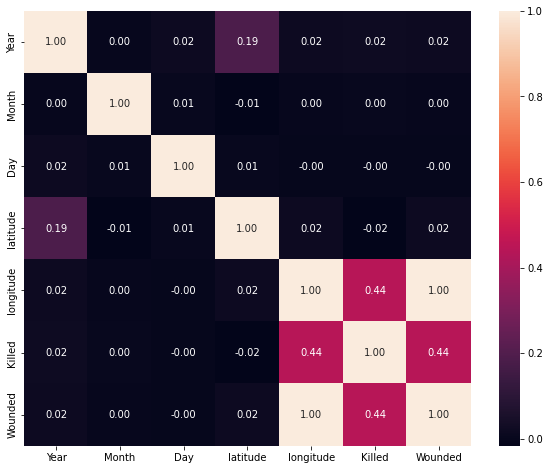

In [ ]:
# plotting Heatmap for correlation of the data
plt.figure(figsize=(10,8))
sns.heatmap(correlat_df,fmt='0.2f',annot=True)

From the above heatmap we can conclude that,some part of data having positive correlation,some part of data shows zero correlation, and very few data showing negative correlation.

# **Number of terrorists activities each Year**

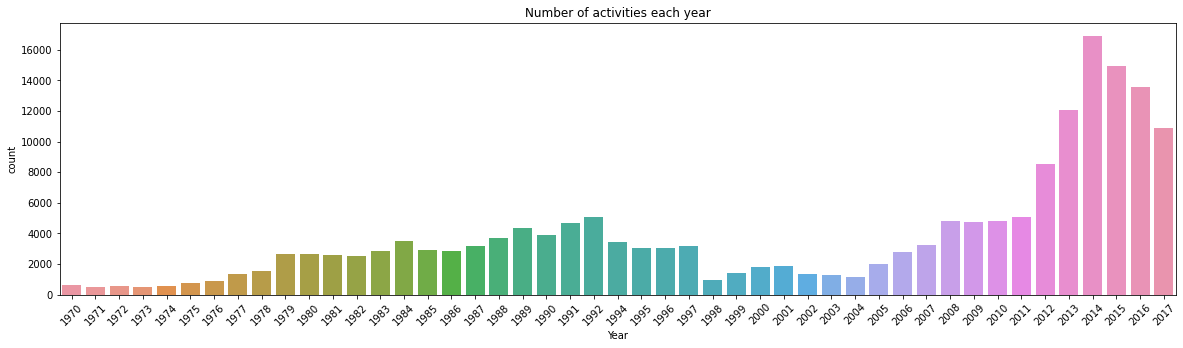

In [ ]:
#Number of terrorists activities each Year

#plot the graph 
plt.figure(figsize=(20,5))
plt.xticks(rotation = 45)
plt.title('Number of activities each year')
sns.countplot(x = gta_df.Year)

From the above graph we can say that year 2014 has the highest activities of terrorists and also sudden drop of activities from year 2015-2017. Year 1970 - 1975 has very low terrorists activities.

# **Number of people died in each year** 

In [ ]:
#Number of people died in each year
died_people = gta_df[['Year', 'Killed']].groupby(['Year']).sum()


Text(0.5, 0, 'Year')

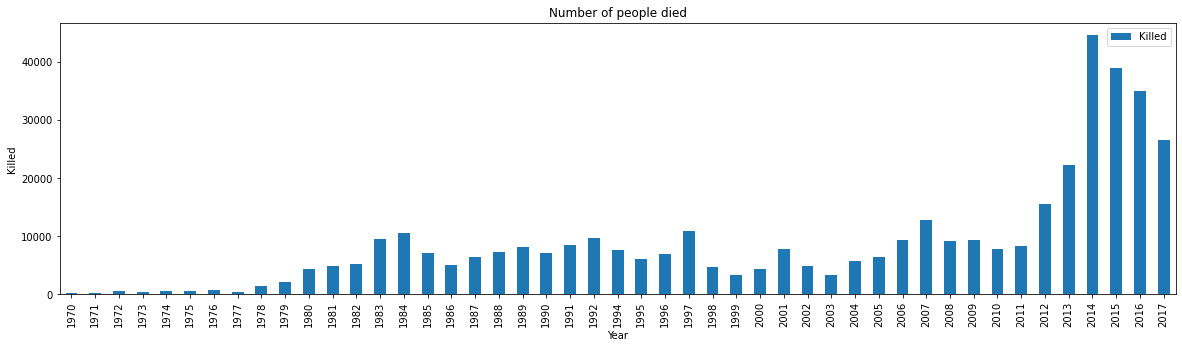

In [ ]:
#Plotting the bar chart for number of people died
died_people.plot(figsize = (20,5), kind = 'bar')

#Setting the title for the plot
plt.title("Number of people died")

#Setting x and y axis label
plt.ylabel("Killed")
plt.xlabel("Year")





*   Maximum number of people died in the year 2014.

*   Least number of people died in the year 1970 & 1971.



# **Number of people died by region**

In [ ]:
# Number of people died by region

#groupby function was used on the column region and killed and sum method applied to get the number of kills by region
region_wise_killed=gta_df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending= False)
region_wise_killed

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


Text(0, 0.5, 'Number of kills')

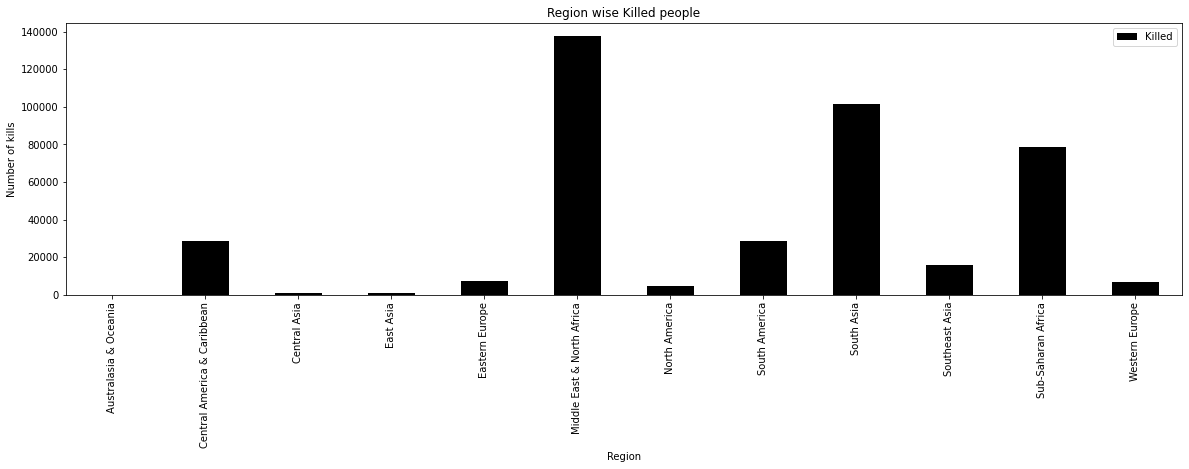

In [ ]:
# plot the bar plot for region wise killed people
gta_df[["Region","Killed"]].groupby("Region").sum().plot(kind="bar", color="black",figsize=(20,5))

#Name the title for the plot
plt.title("Region wise Killed people")

# Set the x & y axis labels
plt.xlabel("Region")
plt.ylabel("Number of kills")

From the above data we can conclude that most of the people from Middle East & North Africa got killed compared to other regions.

# **Counting top 10 countries that are most affected**

In [ ]:
#Counting top 10 countries that are most affected
countries_attacked = gta_df.Country.value_counts()[:10]
countries_attacked

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

Text(0, 0.5, 'Count')

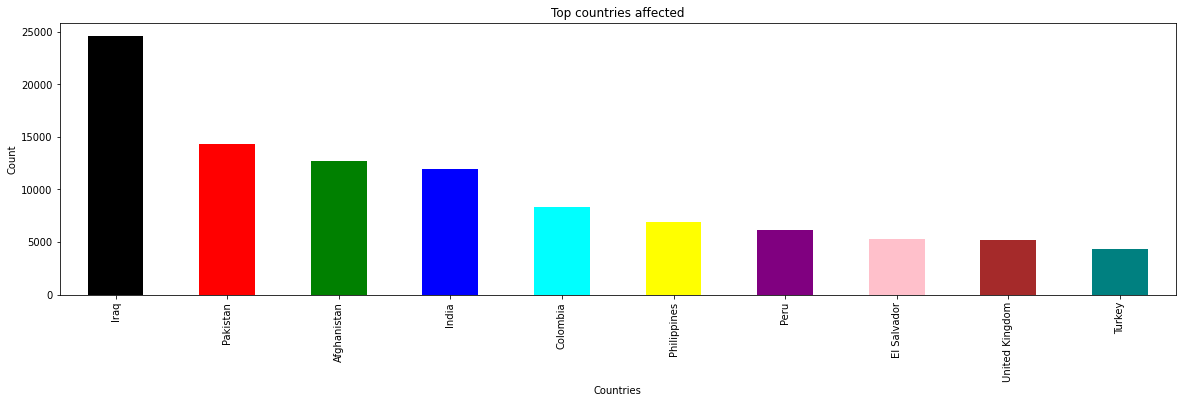

In [ ]:
# Setting the bar plot for top 10 countries affected
countries_attacked.plot(kind = 'bar', figsize = (20,5), color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'purple', 'pink','brown', 'teal'])

# Set title for plot and x,y axis labels
plt.title("Top countries affected")
plt.xlabel("Countries")
plt.ylabel("Count")

From the above we can conclude that the Iraq is highly affected by the killing/wounded of 24636 followed by Pakistan, Afghanistan and India. Where as, Turkey has least affected of 4292 killings/wounded.

# **Least affected Countries**

In [ ]:
least_affected_countries = gta_df['Country'].value_counts().tail(10)
least_affected_countries

Vatican City           1
Falkland Islands       1
St. Lucia              1
North Korea            1
New Hebrides           1
International          1
Wallis and Futuna      1
South Vietnam          1
Andorra                1
Antigua and Barbuda    1
Name: Country, dtype: int64

Text(0.5, 0, 'Countries')

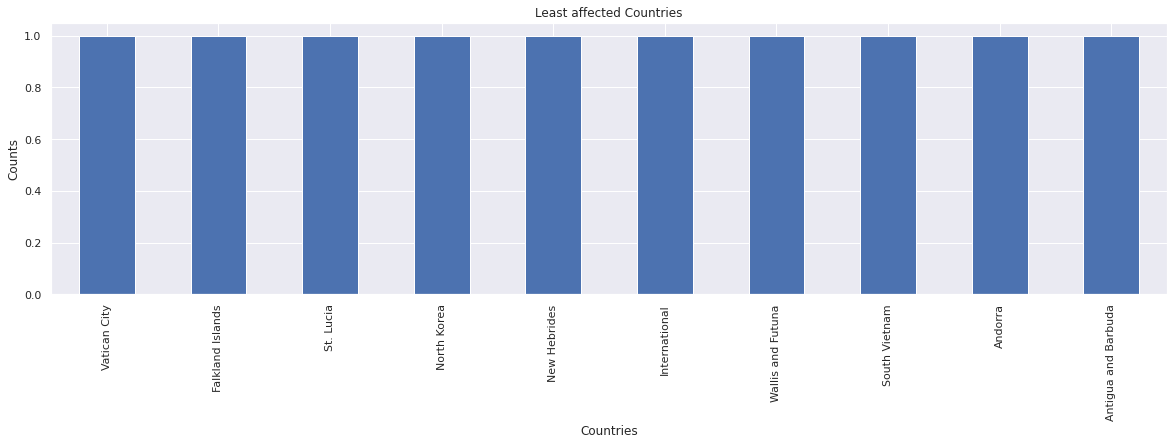

In [ ]:
least_affected_countries.plot(kind='bar', figsize = (20,5))

plt.title('Least affected Countries')
plt.ylabel('Counts')
plt.xlabel('Countries')


# **Most affected Regions**

In [ ]:
#Most affected Regions

#Using group by fuction on year and region column then counting the attacks.
#Using Unstack function  to pivot the level of the indexed columns in a stacked dataframe.
attacks_per_year = gta_df.groupby(['Year', 'Region']).count().unstack()['Country']
attacks_per_year



Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1.0,7.0,NaN,2.0,12.0,28.0,472.0,65.0,1.0,10.0,3.0,50.0
1971,1.0,5.0,NaN,1.0,5.0,55.0,247.0,24.0,NaN,6.0,2.0,125.0
1972,8.0,3.0,NaN,NaN,1.0,53.0,73.0,33.0,1.0,16.0,4.0,376.0
1973,1.0,6.0,NaN,2.0,1.0,19.0,64.0,83.0,1.0,2.0,4.0,290.0
1974,1.0,11.0,NaN,4.0,2.0,42.0,111.0,81.0,2.0,3.0,7.0,317.0
1975,NaN,9.0,NaN,12.0,NaN,44.0,159.0,55.0,4.0,7.0,12.0,438.0
1976,NaN,45.0,NaN,2.0,NaN,55.0,125.0,91.0,4.0,12.0,11.0,578.0
1977,NaN,24.0,NaN,4.0,2.0,211.0,149.0,119.0,2.0,8.0,29.0,771.0
1978,2.0,199.0,NaN,35.0,2.0,128.0,117.0,222.0,2.0,44.0,46.0,729.0


Text(0, 0.5, 'Number of attacks')

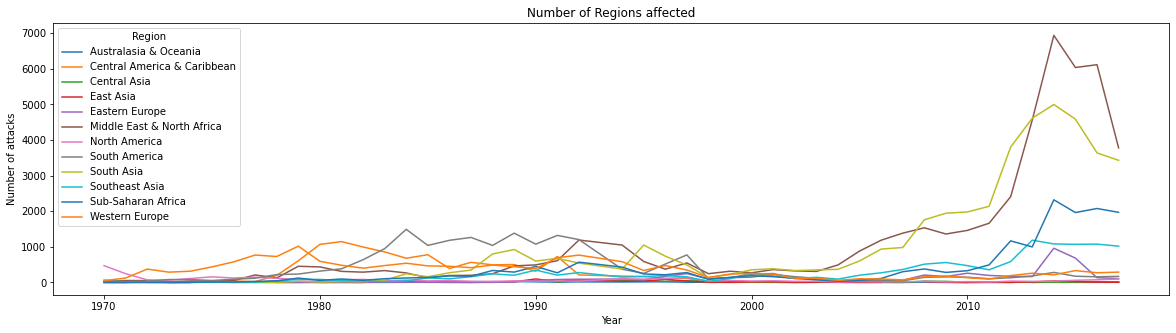

In [ ]:
#Plot the Area Chart
attacks_per_year.plot(kind='line', figsize = (20,5))

#Entering title of the plot
plt.title("Number of Regions affected")

#Setting x and y axis labels
plt.xlabel("Year")
plt.ylabel("Number of attacks")

From above we can say that the regions Middle East and South asia are highly affected as compared to the other regions.

# **Regions affected in the year 2014**

In [ ]:
#Regions affected in the year 2014

# value counts has been used to get number of region affected in 2014
attacks_2014 = gta_df[gta_df['Year'] == 2014]
affected_attack_2014 = attacks_2014['Region'].value_counts().to_frame()

In [ ]:
affected_attack_2014

,Region
Middle East & North Africa,6939
South Asia,4998
Sub-Saharan Africa,2321
Southeast Asia,1082
Eastern Europe,962
South America,283
Western Europe,215
East Asia,43
North America,37
Australasia & Oceania,9


Text(0.5, 0, 'Number of attacks')

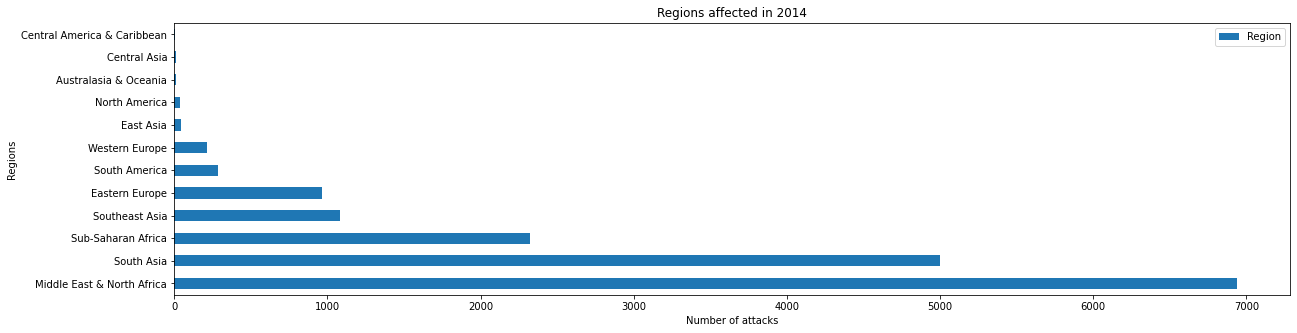

In [ ]:
# Plotting the Horizontal Bar Graph
affected_attack_2014.plot(kind = 'barh', figsize=(20,5))


# Set a title for plot
plt.title("Regions affected in 2014")

# Set x and y axis lable
plt.ylabel("Regions")
plt.xlabel("Number of attacks")


From above we can conclude that region Middle East, North Africa & South asia are highly affected in the year 2014.

# **Attacks in India over the years**

In [ ]:
ind = gta_df.loc[gta_df['Country']=='India', 'Year']

Text(0.5, 1.0, 'Attacks in India over the years')

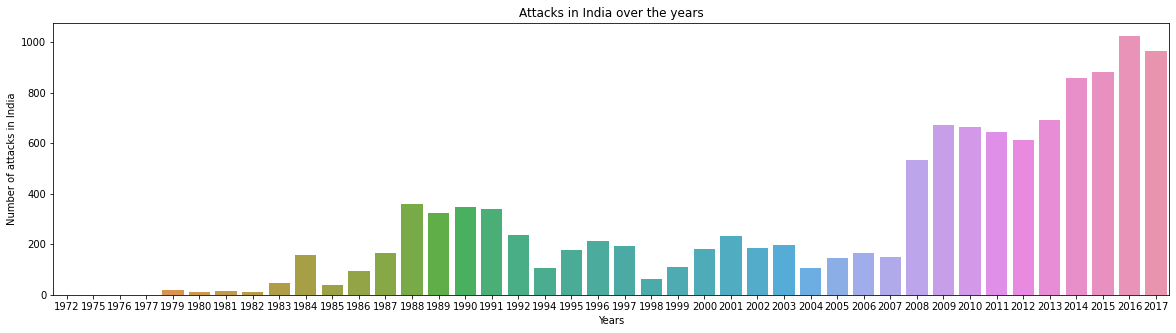

In [ ]:
# plotting bar plot for attacks in India over the years
plt.figure(figsize=(20,5))
sns.countplot(x=ind, data=gta_df)
plt.xlabel('Years')
plt.ylabel('Number of attacks in India')
plt.title('Attacks in India over the years')

From 2007 to 2008 there is a huge jump in the terrorist activity in India. In 2007 149 incidents were recorded,
In 2008 534 incidents were recorded.
There is ~258% rise in the incidents just one year.





# **Attacks on India by City wise**

In [ ]:
# Attacks on India/Indian Cities
attack_on_India = gta_df[gta_df['Country'] == 'India']
attack_on_India['City'].value_counts()
attack_on_India.head(10)

,Year,Month,Day,Country,Region,City,latitude,longitude,Attack_type,Killed,Wounded,Summary,Target_type,Gang_name,Weapon_type,Motive
1186,1972,2,22,India,South Asia,New Delhi,28.585836,0.0,Hijacking,0.0,0.0,0,Airports & Aircraft,Palestinians,Explosives,0
2764,1975,1,2,India,South Asia,Samastipur,25.863042,0.0,Bombing/Explosion,4.0,0.0,"1/2/1975: The Indian Railway Minister, Lalit N...",Government (General),Ananda Marga,Explosives,Unknown
3857,1976,5,26,India,South Asia,New Delhi,28.585836,0.0,Bombing/Explosion,0.0,0.0,0,Airports & Aircraft,Unknown,Explosives,0
5327,1977,9,28,India,South Asia,Bombay,19.075984,0.0,Hijacking,0.0,0.0,0,Airports & Aircraft,Japanese Red Army (JRA),Firearms,0
7337,1979,1,13,India,South Asia,Unknown,26.200605,0.0,Armed Assault,0.0,0.0,0,Police,Naga People,Firearms,0
7342,1979,1,14,India,South Asia,Imphal,24.798346,0.0,Assassination,3.0,0.0,0,Government (General),Unknown,Firearms,0
8174,1979,4,26,India,South Asia,Unknown,24.663717,0.0,Armed Assault,4.0,0.0,0,Police,Meitei extremists,Firearms,0
8685,1979,6,14,India,South Asia,Unknown,23.164543,0.0,Assassination,1.0,0.0,0,Government (General),Mizo National Front,Firearms,0
8831,1979,7,1,India,South Asia,Unknown,26.200604,2.0,Armed Assault,2.0,2.0,0,Government (General),Mizo National Front,Firearms,0
8836,1979,7,2,India,South Asia,Aizawl,23.727107,0.0,Facility/Infrastructure Attack,0.0,0.0,0,Police,Mizo National Front,Unknown,0


Text(0.5, 0, 'City')

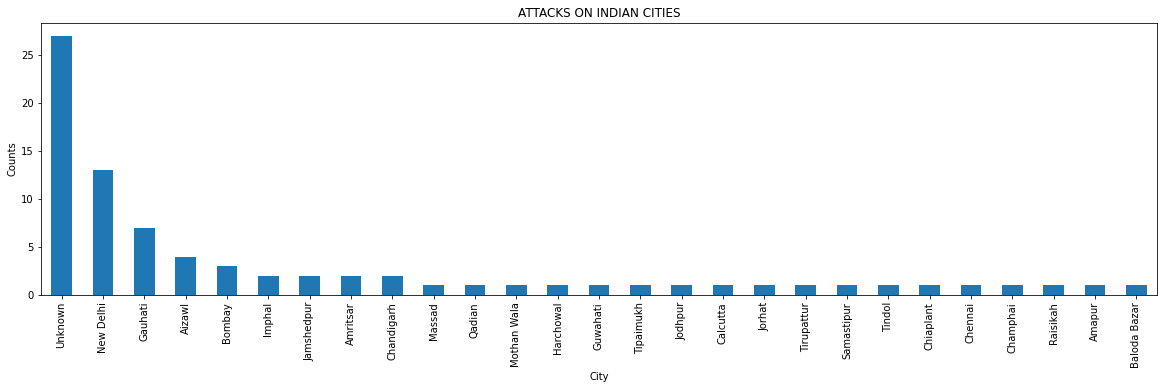

In [ ]:
attack_on_India['City'].head(80).value_counts().plot.bar(figsize = (20,5))

plt.title('ATTACKS ON INDIAN CITIES')
plt.ylabel('Counts')
plt.xlabel('City')


As per above information most of the terrorists attacks happened in the city which we do not have information about but as per information on Google most of terrorist attacks happened in Jammu and Kashmir we cannot say exactly  & it is followed by New Delhi and Gauhati.



# **Types of terrorists attacks**



In [ ]:
#Types of terrorist attacks
type_of_attacks=gta_df['Attack_type'].value_counts()
type_of_attacks

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

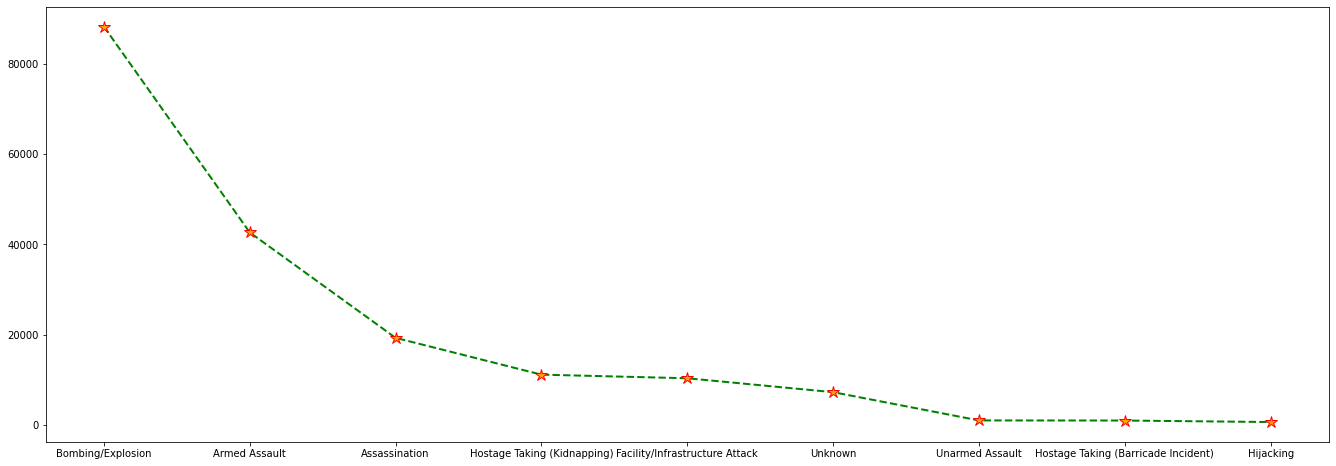

In [ ]:
# Plot area chart
plt.figure(figsize=(23,8))
type_of_attacks.plot(kind="line",color='green',ls='--',linewidth=2.00,marker='*',markersize=12,markeredgecolor='red',markerfacecolor='orange')

From above we can conclude that Bombing/Explosion types of attack are highly
used followed by armed assault, assassination. Hijacking is least used.

# **Attack types used in each region**

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text major ticklabel objects>)

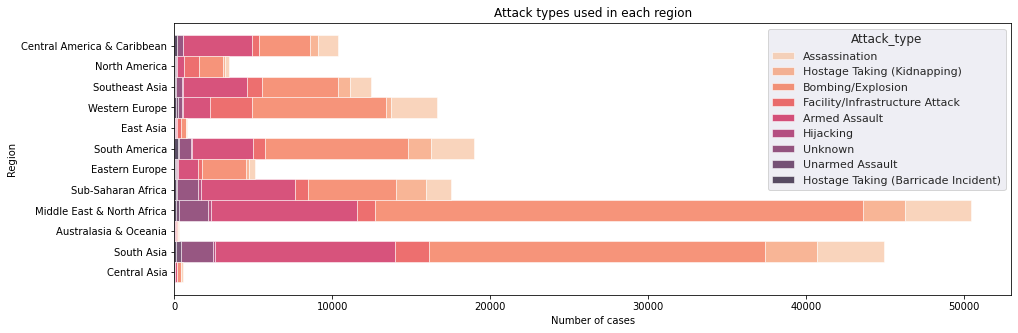

In [ ]:
# Attack type used in each region
plt.subplots(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.histplot(y = 'Region',data =gta_df,hue = "Attack_type",multiple="stack",palette="rocket_r",linewidth = 0.5).set(title = 'Attack types used in each region',xlabel = 'Number of cases',ylabel = 'Region')
plt.xticks(rotation = 0)

By observing the above plot, we conclude that most attacks were done in Middle East & North Africa and type of attack used most is Bombing/Explosion.


# **Attacks based on target types**

In [ ]:
# Attacks based on target types

# finding terrorist attack and their target type
target_type = gta_df[["Target_type"]].value_counts()
target_type

Target_type                   
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
dtype: int64

Text(0, 0.5, 'No of target')

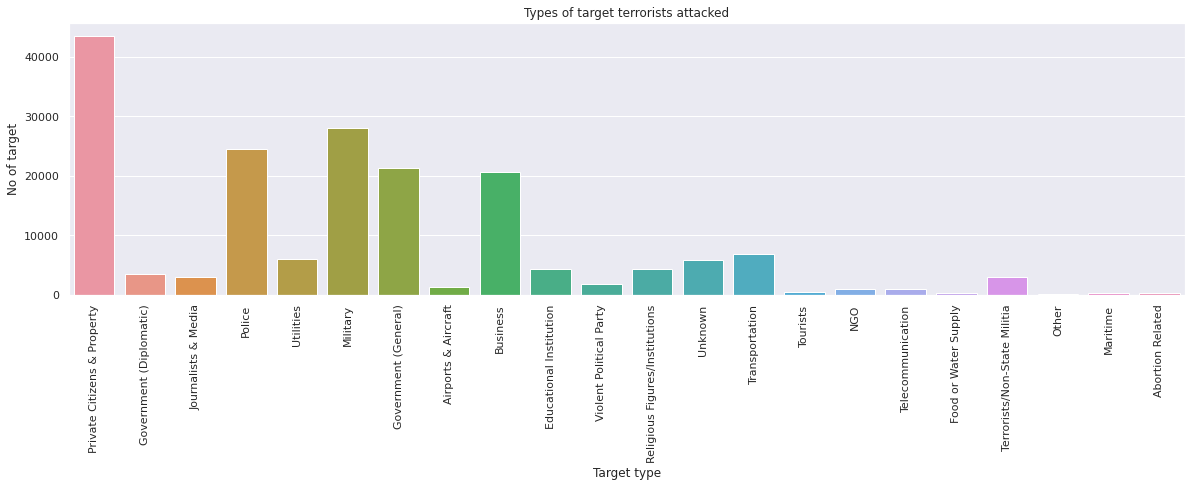

In [ ]:
# Plotting bar plot for Attacks based on target types
plt.figure(figsize=(20,5))

# Countplot is used to count the number of observation of target type
sns.countplot(x=gta_df.Target_type)

#Manages the position of types of target to 90 degree
plt.xticks(rotation=90)

#Put the title for the plot
plt.title("Types of target terrorists attacked")

#Set x & y labels
plt.xlabel("Target type")
plt.ylabel("No of target")

From above plot we can conclude that the private citizens and properties are mostly targeted by the terrorists.

# **Types of weapons used by terrorists**

In [ ]:
# Types of weapons used by terrorists
types_of_weapon = gta_df['Weapon_type'].value_counts()
types_of_weapon

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

Text(0, 0.5, 'Number of weapons')

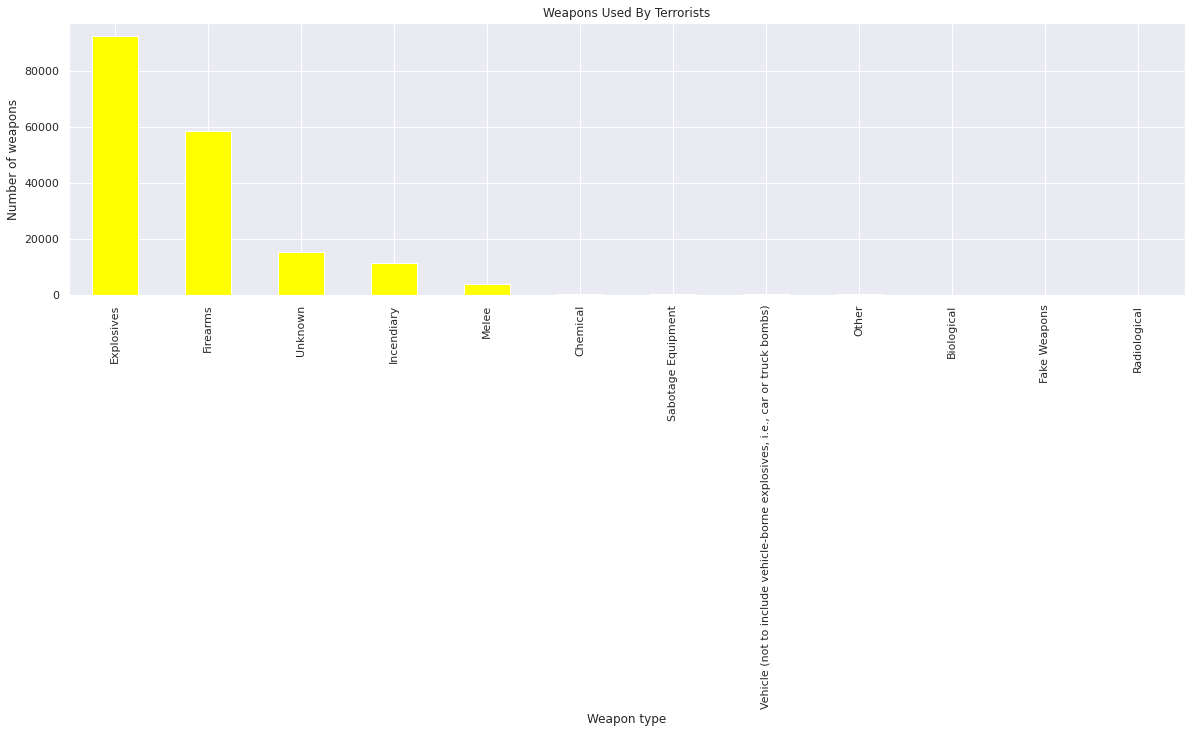

In [ ]:
# ploting the bar plot for types of weapons used by terrorists
plt.figure(figsize=(20,5))
types_of_weapon.plot(kind='bar',color='yellow')

# Set the title & x,y axis labels for the plot
plt.title("Weapons Used By Terrorists")
plt.xlabel("Weapon type")
plt.ylabel("Number of weapons")

From above plot we can say that weapons like explosives are mostly used by the terrorists Whereas melees and chemical are least used.

# **Top Terrorists Gangs**

In [ ]:
#Top Terrorists Gang

#Top 20 terrorists ganngs are sliced
Top_terrorists_gangs = gta_df['Gang_name'].value_counts()[:20]
Top_terrorists_gangs

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

Here it is showing that unknown groups (we don't know the name of the groups) are in 1st position. As we don't know the name of that groups,we can't give any clarity about that proper position. So we have to plot a graph with the groups having names.



Text(0, 0.5, 'Terrorists groups')

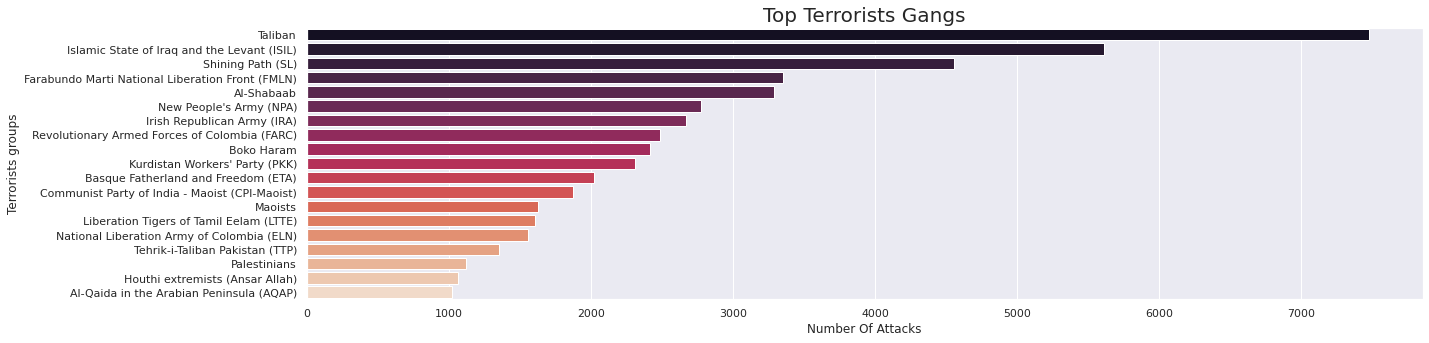

In [ ]:
#plotting the horizontal  bar graph for top terrorists gangs
plt.figure(figsize=(20,5))

# sns.barplot calculates the statistics for gang name and palette uses brighter colour to represent the statistics
sns.barplot(y=gta_df['Gang_name'].value_counts()[1:20].index,x=gta_df['Gang_name'].value_counts()[1:20].values,palette='rocket')

# Set title and x,y label for plot
plt.title('Top Terrorists Gangs',size=20)
plt.xlabel('Number Of Attacks')
plt.ylabel('Terrorists groups')


From above plot we can conclude that Taliban is the top terrorists gang to carry out their activities followed by ISIl and Shining Path.




# **Conclusion:**

From the above study we can conclude the following:


*   Maximum activities of terrorists gangs were observed in the year 2014. After 2004 activities started increasing gaining its peak to year 2014 and moderate decline from 2015-2017. In 1970-1972 the activities were least observed.

*   As the activities of terrorists gangs were high in 2014, the high number of deaths were also observed in the same year.



*   The highest number of deaths were observed in the regions of Middle East & North Africa followed by South Asia and Sub-Saharan Africa and the least Central Asia.

*   Iraq is highly affected by the terrorists activities followed by Pakistan, Afghanistan and India.


*   Taliban is the most dangerous and top terrorist gang observed from the study.



*   Most of Bombing/Explosions types of attacks are used by terrorists.

  

*   From 2007 to 2008 there is huge jump in the terrorist activity in India. There are total 7590 attacks took place in India. 



*    Most of terrorist attacks happened in Jammu and Kashmir we cannot say exactly & it is followed by New Delhi and Gauhati.








*   Terrorists mostly target public citizen, property, military, police, Governments servants.

*  Terrorists mostly use explosives, firearms for attacking purpose.



*   Mostly Bombing/Explosives attack method are used in every year that led to higher number of deaths.



*   This activities are active from the year 2014 and is continuing.












